# Upper-Limb Functioning Analysis

This notebooks demonstrates how to use the `ulfunc` package of the ``monalysa`` 
library to quantify different constructs of upper limb functioning.

Contact siva82kb@gmail.com for any queries.

### Install the most recent monalysa library

In [1]:
import sys
sys.path.append('../../../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import monalysa

In [3]:
from monalysa import readers
from monalysa import movements
from monalysa import quality
from monalysa import ulfunc

In [4]:
import pathlib
import re
from datetime import datetime as dt
from datetime import timedelta as td
import pandas as pd

## 1. Reading ActiGraph data

In [5]:
datadir = pathlib.Path('../../../data/ulfunc_data/')

'../../../data/ulfunc_data'

In [11]:
fname_left = datadir / "MOS2E19230004 (2023-08-02)RAW.csv"
fname_right = datadir / "MOS2E19231076 (2023-08-02)RAW.csv"

# Read ActiGraph data
agdata_left = readers.ActiGraphData(filename=fname_left, devid="left")
agdata_right = readers.ActiGraphData(filename=fname_right, devid="right")

(-4.0, 4.0)

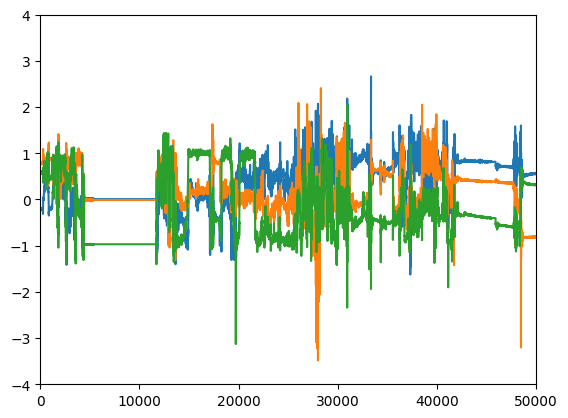

In [23]:
plt.plot(agdata_left.data['AcclX'])
plt.plot(agdata_left.data['AcclY'])
plt.plot(agdata_left.data['AcclZ'])
plt.xlim(0, 50000)
plt.ylim(-4, 4)

,AcclX,AcclY,AcclZ,TimeStamp
0,-0.199,0.828,0.582,2023-08-02 09:15:00.000
1,-0.219,0.797,0.574,2023-08-02 09:15:00.010
2,-0.223,0.793,0.555,2023-08-02 09:15:00.020
3,-0.227,0.793,0.543,2023-08-02 09:15:00.030
4,-0.223,0.785,0.539,2023-08-02 09:15:00.040
...,...,...,...,...
2807795,0.000,0.000,0.000,2023-08-02 17:02:57.950
2807796,0.000,0.000,0.000,2023-08-02 17:02:57.960
2807797,0.000,0.000,0.000,2023-08-02 17:02:57.970
2807798,0.000,0.000,0.000,2023-08-02 17:02:57.980


In [9]:
testdf = readers.ActiGraphData(filename=test, devid="left")
testdf.data

No sampling frequency information found in the header. Cannot set the timestamp.


,AcclX,AcclY,AcclZ
0,-0.199,0.828,0.582
1,-0.219,0.797,0.574
2,-0.223,0.793,0.555
3,-0.227,0.793,0.543
4,-0.223,0.785,0.539
...,...,...,...
2807795,0.000,0.000,0.000
2807796,0.000,0.000,0.000
2807797,0.000,0.000,0.000
2807798,0.000,0.000,0.000


In [10]:
test2df = readers.ActiGraphData(filename=test2, devid="left")
test2df.data

,Date,Time,Axis1,Axis2,Axis3,Steps,Lux,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,TimeStamp
0,2021-12-20,11:30:00,0,0,0,0,0,1,0,0,0,0.0,2021-12-20 11:30:00
1,2021-12-20,11:30:01,0,0,0,0,0,1,0,0,0,0.0,2021-12-20 11:30:01
2,2021-12-20,11:30:02,0,0,0,0,0,1,0,0,0,0.0,2021-12-20 11:30:02
3,2021-12-20,11:30:03,0,0,0,0,0,1,0,0,0,0.0,2021-12-20 11:30:03
4,2021-12-20,11:30:04,0,0,0,0,0,1,0,0,0,0.0,2021-12-20 11:30:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99873,2021-12-21,15:14:33,0,0,0,0,0,1,0,0,0,0.0,2021-12-21 15:14:33
99874,2021-12-21,15:14:34,0,0,0,0,0,1,0,0,0,0.0,2021-12-21 15:14:34
99875,2021-12-21,15:14:35,0,0,0,0,0,1,0,0,0,0.0,2021-12-21 15:14:35
99876,2021-12-21,15:14:36,0,0,0,0,0,1,0,0,0,0.0,2021-12-21 15:14:36
